# Molecular dynamic anaylsis

Here we will be using MD analysis to look at some results.

## 1. Graph results



C:\Users\danie\AppData\Local\Temp\ipykernel_29560\3887153548.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


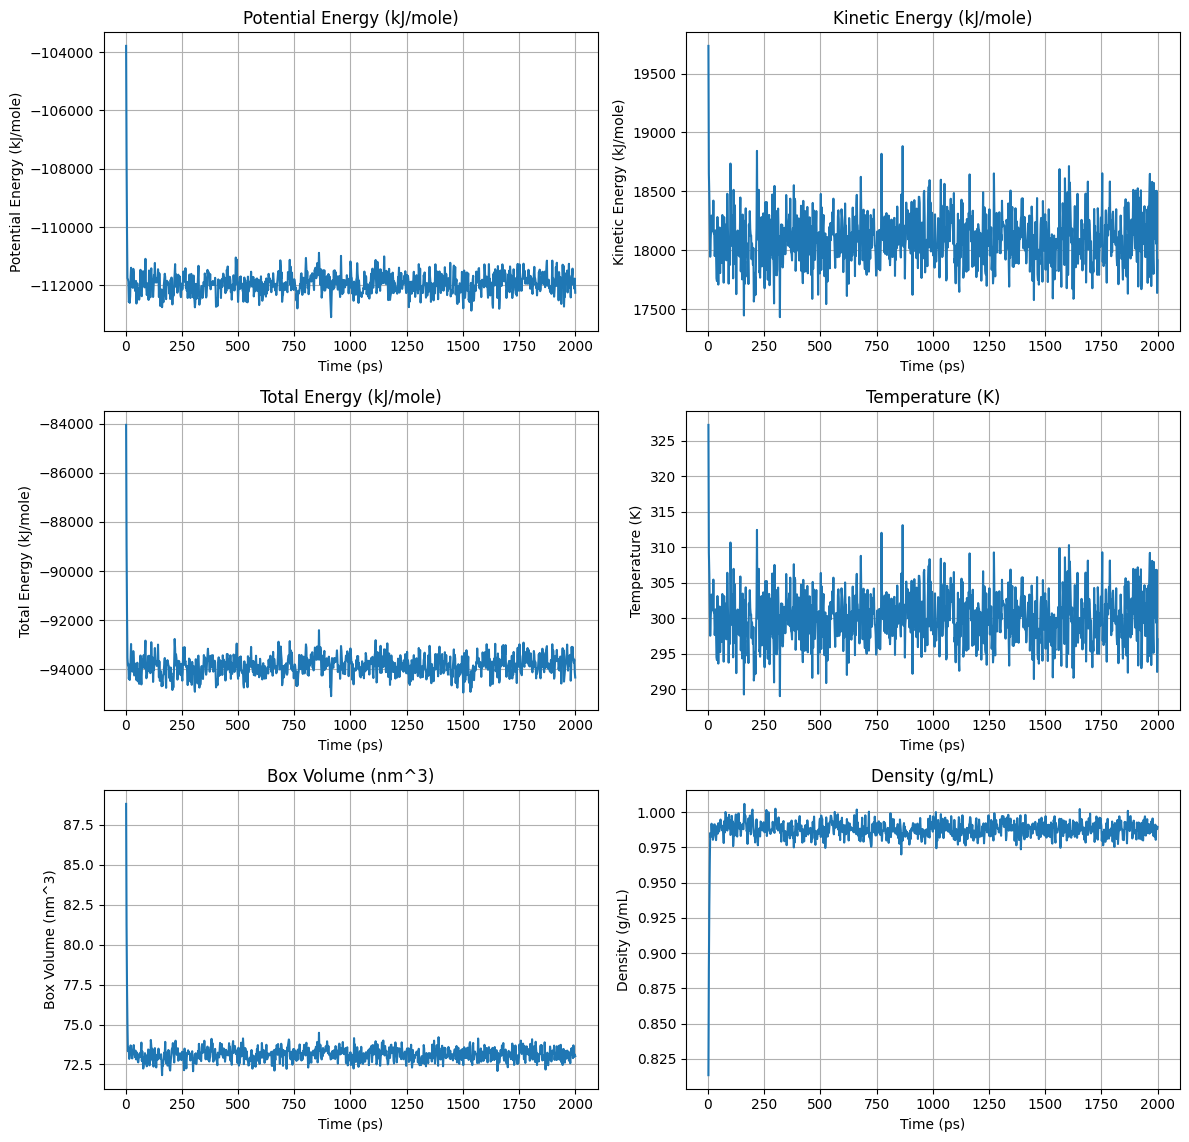

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from your file
file_path = '3HB_monomer_array_results/3HB_monomer_3_3_array_1_atm_data.txt'  # Replace with the actual path
df = pd.read_csv(file_path, delimiter='\t')

# Exclude the last two columns
columns_to_plot = df.columns[3:-2]

# Calculate the number of rows and columns needed for subplots
num_rows = (len(columns_to_plot) + 1) // 2  # +1 to ensure an extra row if there's an odd number of columns
num_cols = min(2, len(columns_to_plot))  # Maximum of 2 columns in each row

# Set up subplots in the calculated arrangement
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Plot each column against "Time (ps)" in a separate subplot
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].plot(df["Time (ps)"], df[column])
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel("Time (ps)")
    axes[row, col].set_ylabel(column)
    axes[row, col].grid(True)

# Remove empty subplots if there are not enough columns to fill all slots
for i in range(len(columns_to_plot), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to prevent clipping of the suptitle
plt.show()

In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

C:\Users\danie\Anaconda3\envs\rdkit\lib\site-packages\MDAnalysis\topology\PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
C:\Users\danie\Anaconda3\envs\rdkit\lib\site-packages\MDAnalysis\coordinates\DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


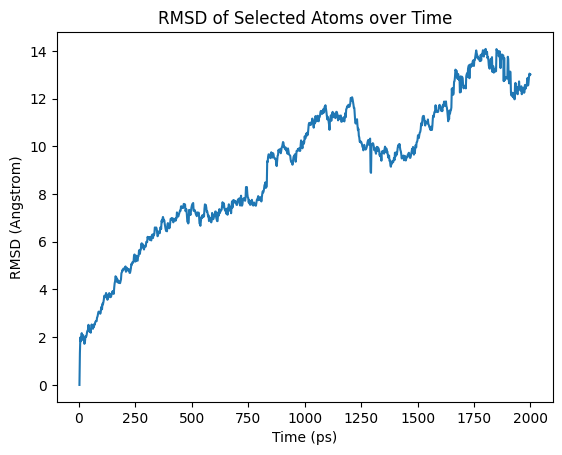

In [3]:
import MDAnalysis as mda
import MDAnalysis.analysis.rms

# Load trajectory and topology files
trajectory_file = '3HB_monomer_array_results/3HB_monomer_3_3_array_1_atm_traj.dcd' 
topology_file = '3HB_monomer_array_results/3HB_monomer_3_3_array.pdb'  # Replace with the actual path to your topology file

# Create a Universe object by providing both trajectory and topology
u = mda.Universe(topology_file, trajectory_file)

# Select atoms by residue name
residue_name = 'AAD'  # Replace with the actual residue name you're interested in
selected_atoms = u.select_atoms(f"resname {residue_name}")

# Calculate RMSD for the selected atoms over time
reference_frame = selected_atoms.positions.copy()
rmsd_values = []
time = []

for ts in u.trajectory:
    current_frame_rmsd = np.sqrt(np.mean((selected_atoms.positions - reference_frame)**2))
    rmsd_values.append(current_frame_rmsd)

for ts in u.trajectory:
    time.append(ts.time)
    
# Plot RMSD over time
plt.plot(time, rmsd_values)
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Angstrom)')
plt.title('RMSD of Selected Atoms over Time')
plt.show()

In [4]:
import nglview as nv

# Visualize the trajectory and molecular structure using NGLView
view = nv.show_mdanalysis(selected_atoms)
view.add_trajectory(u)
view.center_view()

# Display the visualization
view

DEPRECATED: Please use 'center' method


NGLWidget(max_frame=999)

C:\Users\danie\Anaconda3\envs\rdkit\lib\site-packages\MDAnalysis\topology\PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
C:\Users\danie\Anaconda3\envs\rdkit\lib\site-packages\MDAnalysis\coordinates\DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


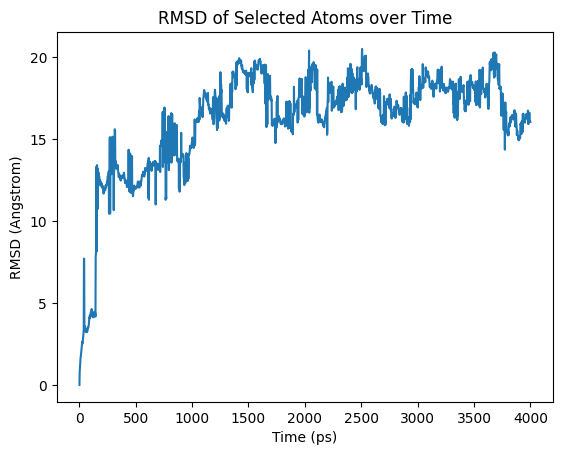

In [5]:
import MDAnalysis as mda
import MDAnalysis.analysis.rms

# Load trajectory and topology files
trajectory_file = '3HB_monomer_array_results/3HB_monomer_3_3_array_prod_traj.dcd' 
topology_file = '3HB_monomer_array_results/3HB_monomer_3_3_array.pdb'  # Replace with the actual path to your topology file

# Create a Universe object by providing both trajectory and topology
u = mda.Universe(topology_file, trajectory_file)

# Select atoms by residue name
residue_name = 'AAD'  # Replace with the actual residue name you're interested in
selected_atoms = u.select_atoms(f"resname {residue_name}")

# Calculate RMSD for the selected atoms over time
reference_frame = selected_atoms.positions.copy()
rmsd_values = []
time = []

for ts in u.trajectory:
    current_frame_rmsd = np.sqrt(np.mean((selected_atoms.positions - reference_frame)**2))
    rmsd_values.append(current_frame_rmsd)

for ts in u.trajectory:
    time.append(ts.time)
    
# Plot RMSD over time
plt.plot(time, rmsd_values)
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (Angstrom)')
plt.title('RMSD of Selected Atoms over Time')
plt.show()

In [6]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load trajectory and topology files
trajectory_file = '3HB_monomer_array_results/3HB_monomer_3_3_array_1_atm_traj.dcd' 
topology_file = '3HB_monomer_array_results/3HB_monomer_3_3_array.pdb'

# Create a Universe object by providing both trajectory and topology
u = mda.Universe(topology_file, trajectory_file)

# Select atoms of the first AAD residue
first_aad_atoms = u.select_atoms(f"resname AAD and resid 5")

# Select atoms of all AAD residues excluding the first one
other_aad_atoms = u.select_atoms(f"resname AAD and not resid 5")

# Calculate RDF between the first AAD residue and other AAD residues
rdf = mda.analysis.rdf.InterRDF(first_aad_atoms, other_aad_atoms, nbins=100, range=(0.0, 10.0))
rdf.run()

# Plot RDF
plt.plot(rdf.bins, rdf.rdf)
plt.xlabel('Distance (Angstrom)')
plt.ylabel('Radial Distribution Function (RDF)')
plt.title('RDF between First AAD Residue and Other AAD Residues')
plt.show()


AttributeError: module 'MDAnalysis.analysis' has no attribute 'rdf'

## Mdanalysis tutorial

In [10]:
print(u)

<Universe with 7224 atoms>


In [11]:
ag = u.atoms
type(ag)

MDAnalysis.core.groups.AtomGroup

In [12]:
ag.indices

array([   0,    1,    2, ..., 7221, 7222, 7223], dtype=int64)

In [13]:
ag.names

array(['O1', 'C1', 'C2', ..., 'O', 'H1', 'H2'], dtype=object)

In [14]:
ag.resnames

array(['AAD', 'AAD', 'AAD', ..., 'WAT', 'WAT', 'WAT'], dtype=object)

In [15]:
ag.resids

array([   1,    1,    1, ..., 2372, 2372, 2372])

In [16]:
ag.resids.shape # All atoms have the same resid if they are from the same molecule

(7224,)

In [17]:
ag.resnames

array(['AAD', 'AAD', 'AAD', ..., 'WAT', 'WAT', 'WAT'], dtype=object)

In [18]:
ag.charges # Psf topologies have this information - our topology does not

NoDataError: This Universe does not contain charge information

In [19]:
ag.masses

array([15.999, 12.011, 12.011, ..., 15.999,  1.008,  1.008])

In [20]:
ag.types

array(['O', 'C', 'C', ..., 'O', 'H', 'H'], dtype=object)

In [21]:
print(ag.n_atoms)
print(len(ag.names))

7224
7224


### Working with individual atoms

In [22]:
a = u.atoms[0]
print(a)

<Atom 1: O1 of type O of resname AAD, resid 1 and segid SYSTEM and altLoc >


In [23]:
print("name:", a.name)
print("resid:", a.resid)
print("resname:", a.resname)

name: O1
resid: 1
resname: AAD


In [24]:
ag = u.atoms[:10]
ag.names

array(['O1', 'C1', 'C2', 'C3', 'C4', 'O2', 'O3', 'H1', 'H2', 'H3'],
      dtype=object)

## Residue groups and segment groups

In [25]:
u.residues

<ResidueGroup with 2372 residues>

In [26]:
u.segments

<SegmentGroup with 1 segment>

In [27]:
u.residues.resnames

array(['AAD', 'AAD', 'AAD', ..., 'WAT', 'WAT', 'WAT'], dtype=object)

In [28]:
u.segments.segids


array(['SYSTEM'], dtype=object)

In [29]:
u.residues[0].atoms

<AtomGroup with 15 atoms>

In [30]:
ag.residues

<ResidueGroup with 1 residue>

## Determining atoms counts, residue counts and segment counts

In [31]:
print("Atoms:", u.atoms.n_atoms)
print("Residues:", u.residues.n_residues)
print("Segments:", u.segments.n_segments)

Atoms: 7224
Residues: 2372
Segments: 1


## Naming specific parts of a system: i.e. 1st segment, last atom, 10th residue

In [32]:
print("First segments:", u.segments[0].segid)
print("Last atom:", u.atoms[-1].name)
print("10th residue", u.residues[9].resname)

First segments: SYSTEM
Last atom: H2
10th residue WAT


## Selecting atoms - can be numpy style, boolean

In [33]:
u.atoms[[1,4,5,0]]

<AtomGroup with 4 atoms>

In [34]:
u.atoms[1:10]

<AtomGroup with 9 atoms>

In [35]:
selection = u.atoms.resnames == "AAD"
print("Selection = ", selection)
u.atoms[selection]

Selection =  [ True  True  True ... False False False]


<AtomGroup with 135 atoms>

In [36]:
# Similar to above but shorter
u.atoms[u.atoms.resnames == "AAD"]

<AtomGroup with 135 atoms>

In [37]:
# Instead of atom selection, we can do a residue selection too
u.residues[u.residues.resnames == "AAD"]

<ResidueGroup with 9 residues>

In [38]:
#u.atoms.select_atoms? # THis will bring up a fancy help thingy as a docstring

## String selection of atoms

In [39]:
monomers = u.select_atoms("resname AAD")
monomers

<AtomGroup with 135 atoms>

In [40]:
first10residues = u.select_atoms("resid 1-10")
first10residues

<AtomGroup with 138 atoms>

In [41]:
# Could also select residues that are acidic or alkaline
water_or_mon = u.select_atoms("resname AAD or resname WAT")
water_or_mon

<AtomGroup with 7224 atoms>

In [42]:
oxygens = water_or_mon.select_atoms("name O*") # * selects all oxygens (OD1, OD2, OD3)
oxygens

<AtomGroup with 2390 atoms>

In [43]:
backbone = u.select_atoms("backbone")
backbone2 = u.select_atoms("name CA C O")
backbone2

<AtomGroup with 2363 atoms>

In [44]:
ag1 = u.residues[99:200]
ag2 = u.select_atoms("resid 100-200").residues
ag1 == ag2

True

In [45]:
print(ag1.atoms)
print(ag1.residues)
print(ag1.segments)

<AtomGroup [<Atom 406: O of type O of resname WAT, resid 100 and segid SYSTEM and altLoc >, <Atom 407: H1 of type H of resname WAT, resid 100 and segid SYSTEM and altLoc >, <Atom 408: H2 of type H of resname WAT, resid 100 and segid SYSTEM and altLoc >, ..., <Atom 706: O of type O of resname WAT, resid 200 and segid SYSTEM and altLoc >, <Atom 707: H1 of type H of resname WAT, resid 200 and segid SYSTEM and altLoc >, <Atom 708: H2 of type H of resname WAT, resid 200 and segid SYSTEM and altLoc >]>
<ResidueGroup [<Residue WAT, 100>, <Residue WAT, 101>, <Residue WAT, 102>, ..., <Residue WAT, 198>, <Residue WAT, 199>, <Residue WAT, 200>]>
<SegmentGroup [<Segment SYSTEM>]>


## Geometric selections

In [46]:
upper_z = u.select_atoms("prop  z > 10")
upper_z

<AtomGroup with 5869 atoms>

In [47]:
dimensions = u.dimensions
dimensions

array([40.022705, 47.4737  , 46.74279 , 90.      , 90.      , 90.      ],
      dtype=float32)

## Visualisation

In [48]:
view_u = nv.show_mdanalysis(u)
view_u.camera = "orthographic"
view_u

NGLWidget(max_frame=999)

In [49]:
first_3_res = u.residues[0:3]
view_3res = nv.show_mdanalysis(first_3_res)
view_3res

NGLWidget(max_frame=999)

In [50]:
# Can add other selections so prev view
nineres = u.residues[8]
view_3res.add_trajectory(nineres)
view_3res

NGLWidget(max_frame=999)

In [51]:
ag = u.select_atoms("prop x > 4")
view_ex3 = nv.show_mdanalysis(ag)
view_ex3

NGLWidget(max_frame=999)

In [52]:
water = u.select_atoms("resname WAT")
view_wat = nv.show_mdanalysis(water)
view_wat

NGLWidget(max_frame=999)

## Bonds

In [53]:
u.bonds # Could give an error if there is no connectivity info in the topology file, md anal has some guesses though

NoDataError: This Universe does not contain bonds information

In [54]:
u = mda.Universe(topology_file, trajectory_file, guess_bonds=True)

C:\Users\danie\Anaconda3\envs\rdkit\lib\site-packages\MDAnalysis\topology\PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
C:\Users\danie\Anaconda3\envs\rdkit\lib\site-packages\MDAnalysis\coordinates\DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [55]:
u.atoms.bonds

<TopologyGroup containing 4852 bonds>

In [56]:
u.atoms.angles

<TopologyGroup containing 2570 angles>

In [57]:
u.atoms.bonds[3]

<Bond between: Atom 1, Atom 3>

In [58]:
u.atoms.bonds.values() # look at the bonds

array([1.37017777, 0.972999  , 1.58106179, ..., 1.01181052, 1.01181094,
       1.01181133])

In [59]:
u.bonds[2].value()

1.581061801040849

(array([4.744e+03, 5.400e+01, 1.000e+00, 6.000e+00, 2.000e+00, 6.000e+00,
        7.000e+00, 6.000e+00, 1.400e+01, 1.200e+01]),
 array([0.972999  , 1.03571553, 1.09843206, 1.16114858, 1.22386511,
        1.28658164, 1.34929816, 1.41201469, 1.47473122, 1.53744775,
        1.60016427]),
 <BarContainer object of 10 artists>)

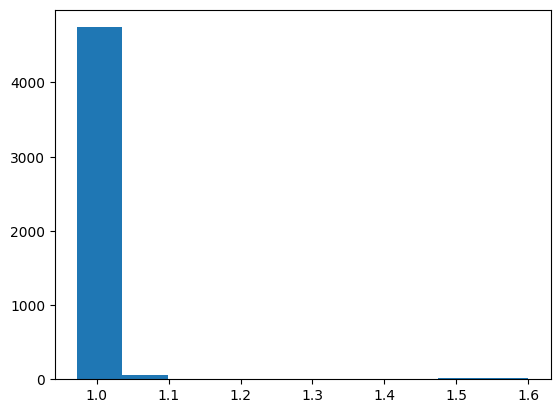

In [61]:
plt.hist(u.atoms.bonds.values()) # all bonds, most are restricted OH bonds in water molecules

(array([18., 54.,  1.,  6.,  2.,  6.,  7.,  6., 14., 12.]),
 array([0.972999  , 1.03571553, 1.09843206, 1.16114858, 1.22386511,
        1.28658164, 1.34929816, 1.41201469, 1.47473122, 1.53744775,
        1.60016427]),
 <BarContainer object of 10 artists>)

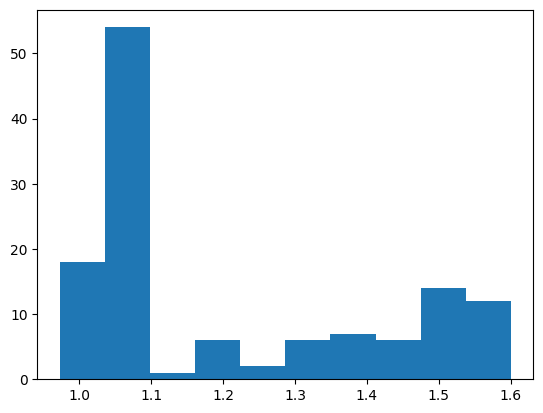

In [63]:
# Can select only the monomers
monomers = u.select_atoms("resname AAD")
plt.hist(monomers.atoms.bonds.values())

## Distances of atoms and stuff

In [65]:
from MDAnalysis.lib import distances
distances

<module 'MDAnalysis.lib.distances' from 'C:\\Users\\danie\\Anaconda3\\envs\\rdkit\\lib\\site-packages\\MDAnalysis\\lib\\distances.py'>

In [67]:
ag1 = u.atoms[:10]
ag2 = u.atoms[10:30]

In [73]:
da = distances.distance_array(ag1.positions, ag2.positions, box=u.dimensions)
da.shape

(10, 20)

In [74]:
da # Returns the distances between each atom in one group with all other atoms of another group

array([[2.6986122 , 2.84907719, 2.57291981, 3.40921885, 4.01173901,
        5.83279671, 4.79797379, 4.71444561, 5.39344308, 5.94344855,
        6.74284921, 5.78609326, 5.50167981, 3.8847819 , 5.70848642,
        4.63426003, 4.07530773, 6.35481315, 4.94563071, 6.16698938],
       [2.33225993, 2.19791845, 2.12237673, 2.3239204 , 4.03867074,
        5.5803657 , 4.52213189, 4.83501976, 4.81819383, 5.08283001,
        5.87366399, 4.72047104, 5.30531475, 3.58205763, 5.81805001,
        4.98053583, 4.25697511, 5.84978618, 4.31318329, 5.01609197],
       [1.09690114, 1.09689836, 2.71385713, 3.00712148, 5.45267484,
        5.16077752, 3.88500252, 4.16001862, 3.80510527, 4.24561035,
        5.24244953, 3.7897627 , 5.16856586, 3.23558466, 4.97078406,
        4.63108189, 3.4347119 , 4.73416464, 3.05414664, 4.33844675],
       [3.01518517, 3.43311294, 1.09689989, 1.09689939, 3.09705977,
        4.81401241, 4.05990722, 4.73079461, 4.5093994 , 4.49187449,
        5.02918832, 4.33100889, 4.37141849, 3

In [76]:
print(f'The distance between {ag1[3]} and {ag2[5]} is {da[3, 5]} A')

The distance between <Atom 4: C3 of type C of resname AAD, resid 1 and segid SYSTEM and altLoc > and <Atom 16: O1 of type O of resname AAD, resid 2 and segid SYSTEM and altLoc > is 4.81401240652613 A


In [80]:
# Self distance array - one atom group, and calculate the distance between each atom
sda = distances.self_distance_array(ag1.positions, box=None)
print(f'Our input atom group had size {len(ag1)} and the output has shape {sda.shape}')

Our input atom group had size 10 and the output has shape (45,)


In [81]:
sda

array([1.37017777, 2.3734946 , 2.37483059, 2.8982538 , 3.19204946,
       3.67353489, 0.972999  , 1.98156983, 3.2956456 , 1.58106179,
       1.52679128, 2.45986307, 2.82092237, 3.54142844, 1.85276375,
       1.09689964, 2.1809833 , 2.5321979 , 3.83909597, 4.33866272,
       4.80903317, 2.37108131, 2.20495847, 1.09689821, 1.45886662,
       2.37160125, 2.37288556, 3.17892659, 2.22115487, 2.6729363 ,
       1.21942778, 1.33430807, 3.79266934, 2.7462487 , 4.03517608,
       2.19477127, 3.93732403, 2.63400916, 4.56266061, 4.63719011,
       4.0043632 , 5.04144392, 2.18587654, 3.3993144 , 2.60371622])

In [82]:
# Calculating bonds - pairwise distances NOT bonds!
coords1 = u.atoms[:10]
coords2 = u.atoms[10:20]
dist = distances.calc_bonds(coords1, coords2, box=None)

In [84]:
print(f'The inputs had len {len(coords1)} and {len(coords2)} and the output has shape {dist.shape}')
print()
print(f'The distance between the first coordinate in each array is: {dist[0]}')


The inputs had len 10 and 10 and the output has shape (10,)

The distance between the first coordinate in each array is: 2.69861217865056


In [85]:
# Calculating angles and dihedrals
coords3 = u.atoms[20:30].positions

In [87]:
angles = distances.calc_angles(coords1, coords2, coords3, box=None, result=None) # middle one is apex of angle
print(np.rad2deg(angles))

[120.71733418  84.8424308  116.57791923  63.78838254  55.23463179
  73.81898943  96.30466725 110.42668377  52.30202712  68.58803199]


In [90]:
coords4 = u.atoms[30:40].positions # need 4 for dihedrals
dihedrals = distances.calc_dihedrals(coords1, coords2, coords3, coords4)
dihedrals

array([-0.59577961, -0.85127764,  1.62163915,  1.67982875,  0.52740058,
       -0.05614138,  0.41261503,  0.52729259,  0.3978766 ,  0.37344566])

## Minimum image convention

In [91]:
print(f'The size of the box of the unvierse isd {u.dimensions}')

The size of the box of the unvierse isd [40.022705 47.4737   46.74279  90.       90.       90.      ]


In [94]:
monomer = u.select_atoms("resname AAD")
print(f'The maximum distance without periodic boundaries is {distances.self_distance_array(monomer).max()}')
print(f'The maximum distance with periodic boundaries is {distances.self_distance_array(monomer,  box=u.dimensions).max()}')
# These could return different numbers sometimes - i.e. across a box versus across images

The maximum distance without periodic boundaries is 19.802968808652526
The maximum distance with periodic boundaries is 19.80296916995697


## Capped distances - only interested in distances up to certain limit

In [103]:
hydrogens = u.select_atoms('resname WAT and type H')
acceptoor = u.select_atoms('resname AAD and type O')

print(f'We have {len(hydrogens)} hydrogens and {len(acceptoor)} acceptors')

ix, dist = distances.capped_distance(hydrogens.positions, acceptoor.positions, min_cutoff=1.0, max_cutoff=4.0, box=u.dimensions)

print(f'We found {len(ix)} contacts les than 4.0 A')
print()
print(f'The first threee are {ix[:3]} at distances {dist[:3]}')

We have 4726 hydrogens and 27 acceptors
We found 134 contacts les than 4.0 A

The first threee are [[1518   15]
 [1518   17]
 [1518   16]] at distances [2.18634857 3.94740022 3.18440756]


In [106]:
%timeit distances.distance_array(hydrogens.positions, acceptoor.positions, box=u.dimensions)

7.69 ms ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [107]:
# Supposedly this is faster than the above brute force solution
%timeit distances.capped_distance(hydrogens.positions, acceptoor.positions, min_cutoff=1.0, max_cutoff=4.0, box=u.dimensions)

19 ms ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## More distances

In [109]:
set(u.atoms.types)

{'C', 'H', 'O'}

In [110]:
C = u.select_atoms('type C')
C.positions

array([[17.455545, 24.048254, 24.155842],
       [17.057194, 23.096476, 25.353836],
       [18.947792, 24.360079, 24.239847],
       [19.371042, 25.189192, 23.116583],
       [19.267454, 24.362835, 28.28715 ],
       [18.076298, 25.15736 , 28.820814],
       [19.205585, 22.86321 , 28.48574 ],
       [20.333807, 22.087471, 27.858017],
       [19.093565, 22.701748, 19.368975],
       [17.938251, 21.658524, 19.34597 ],
       [20.29329 , 22.318413, 20.317411],
       [21.547937, 23.217535, 20.265219],
       [20.095448, 30.0812  , 27.771719],
       [18.548018, 30.07244 , 27.770039],
       [20.63996 , 28.633026, 28.180162],
       [20.994892, 27.91265 , 26.88623 ],
       [19.797846, 28.251366, 19.758392],
       [18.314571, 27.871777, 19.619238],
       [20.751345, 27.234005, 18.994638],
       [22.15563 , 27.673021, 18.67197 ],
       [18.107473, 29.213312, 23.44589 ],
       [17.260197, 28.429998, 24.417587],
       [18.90351 , 30.32091 , 24.189041],
       [20.074205, 30.820972, 23.3

In [111]:
cog = np.mean(C.positions, axis=0)
print(cog)

[19.245564 23.393118 23.578024]


In [112]:
C.center_of_geometry()

array([19.24556234, 23.3931183 , 23.57802471])

In [129]:
first_mon = u.residues[1]
rog = first_mon.atoms.radius_of_gyration()
print(rog)

1.959703075781549


In [134]:
# End to end dist
Hb = first_mon.atoms.select_atoms("type ho") # capping
He = first_mon.atoms.select_atoms('(name C) and (around 1.2 (name O))') # other cap


<AtomGroup with 0 atoms>

In [135]:
Hb # The atom types in this topology seem off, we only hace C, o anf H. Should have more info - maybe there is a guess atomtype 
# function or smth

<AtomGroup with 0 atoms>

In [136]:
He

<AtomGroup with 0 atoms>

In [133]:
 np.linalg.norm(Hb.position - He.position) # Should give polmyer chain length based on distance between the caps

AttributeError: AtomGroup has no attribute position. 

In [139]:
# can also use this code
mda.lib.distances.calc_bonds(Hb.position, He.position, box=u.dimensions)

AttributeError: AtomGroup has no attribute position. 

## Identifying H bonds

A h bond is (in this analysis) degined as an interaction between 3 atoms. An acceptor (atom attracted to H), a hydrogen and a donor (atom bonded to H and being dragged along).

Criteria is
H-acceptor distance of 3.0 A
acceptor-H-donor angle of 120 degrees or more

In [141]:
acceptors = u.atoms.select_atoms("type O") # other types of oxygen should be present if psf topology is sued

In [142]:
hydrogens = u.atoms.select_atoms("type H") # type HW can be useed for Hydrogens from water, but I think we need psf

In [147]:
# Distance criteria
%timeit
# distance_array takes to lists and calculates distances between them
da = mda.lib.distances.distance_array(acceptors.positions, hydrogens.positions, box=u.dimensions)

In [148]:
da.shape

(2390, 4798)

In [149]:
da[0, :] # distance between 1st acceptor and all hydrogens

array([ 0.97299903,  1.98156986,  3.29564569, ..., 19.93758617,
       17.6357671 , 16.4115091 ])

In [150]:
da < 3.0 # returns all values as true/false

array([[ True,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True,  True]])

In [151]:
acc_idx, hyd_idx = np.where(da < 3.0)

In [152]:
acc_idx # indices of acceptor atoms in the h group

array([   0,    0,    0, ..., 2389, 2389, 2389], dtype=int64)

In [153]:
hyd_idx # indices  of hydrogens that see acceptors, i.e. H 0 sees 1 acceptor

array([   0,    1,    3, ..., 4435, 4796, 4797], dtype=int64)

In [157]:
# Using capped distance
idx, dists = mda.lib.distances.capped_distance(acceptors.positions, hydrogens.positions, max_cutoff=3.0, box=u.dimensions)

In [159]:
acc_idx, hyd_idx = idx.T # .T tranposes the array and assigns each row to a variable (we have 2 variables, the indices of acceptors and of hydrogens)

In [162]:
pot_hbond_acce = acceptors[acc_idx]
pot_hbond_h = hydrogens[hyd_idx]

In [167]:
%time pot_hbond_donors = sum(h.bonded_atoms[0] for h in pot_hbond_h) # loop over hydrogens and look at the atom bonded to them

Wall time: 2.19 s


In [169]:
harry = pot_hbond_h[0]
harry.bonded_atoms[0]

<Atom 3595: O of type O of resname WAT, resid 1163 and segid SYSTEM and altLoc >

In [170]:
new_group = acceptors + hydrogens # Extra thing, we can add atom groups
new_group

<AtomGroup with 7188 atoms>

In [173]:
pot_hbond_donors.names

array(['O', 'C1', 'O1', ..., 'O', 'O', 'O'], dtype=object)

In [174]:
angles = np.rad2deg(mda.lib.distances.calc_angles(pot_hbond_acce.positions, pot_hbond_h.positions, pot_hbond_donors.positions, box=u.dimensions))

In [177]:
angles

array([165.83366502,  41.56787255,   0.        , ...,   0.        ,
       175.85702258, 159.61170807])

In [179]:
angle_idx = np.where(angles >= 120.0) # find angles greater than or equal to 120 degrees
angle_idx

(array([    0,     5,     8, ..., 13083, 13088, 13089], dtype=int64),)

In [184]:
# Now sieve the potentials for actual ones that meet angle criteria
hbond_acce = pot_hbond_acce[angle_idx]
hbond_h = pot_hbond_h[angle_idx]
hbond_donors = pot_hbond_donors[angle_idx]

In [185]:
hbond_acce, hbond_h, hbond_donors

(<AtomGroup with 5155 atoms>,
 <AtomGroup with 5155 atoms>,
 <AtomGroup with 5155 atoms>)

In [193]:
# can make this into a function
def calculate_hbonds(hydrogens, acceptors):
    idx = mda.lib.distances.capped_distance(acceptors.positions, hydrogens.positions, max_cutoff=3.0, return_distances = False, box=acceptors.dimensions)
    
    acc_idx, hyd_idx = idx.T
    
    pot_hbond_acce = acceptors[acc_idx]
    pot_hbond_h = hydrogens[acc_idx]
    
    pot_hbond_don = sum(h.bonded_atoms[0] for h in pot_hbond_h)
    
    angle_idx = np.where(angles >= 120.0)
    
    hbond_acce = pot_hbond_acce[angle_idx]
    hbond_h = pot_hbond_h[angle_idx]
    hbond_donors = pot_hbond_donors[angle_idx]
    
    return(hbond_acce, hbond_h, hbond_donors)
    
    
    
    

In [195]:
%timeit calculate_hbonds(hydrogens, acceptors)

2.18 s ± 4.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Looking at trajectories - need a psf file

In [196]:
u.trajectory

<DCDReader 3HB_monomer_array_results/3HB_monomer_3_3_array_1_atm_traj.dcd with 1000 frames of 7224 atoms>

In [197]:
u.trajectory.n_frames # number of frames

1000

In [199]:
u.trajectory.dt # time between frames

2.0000000059628116

In [200]:
u.trajectory.totaltime

1998.0000059568488

In [201]:
# The timestep object
u.trajectory.ts

< Timestep 0 with unit cell dimensions [40.022705 47.4737   46.74279  90.       90.       90.      ] >

In [202]:
ts.dimensions

array([37.494392, 44.474697, 43.78996 , 90.      , 90.      , 90.      ],
      dtype=float32)

In [204]:
ts.dimensions is None # false mean we have a dimension

False

In [205]:
# moving through a traj - as md analysis will only look at a single frame at any time
# can use trjectory indexing
first_2_atoms = u.atoms[:2]
print(first_2_atoms.positions)

[[16.727102 25.19929  24.303745]
 [17.455545 24.048254 24.155842]]


In [208]:
# Now advance a few frames and print again
u.trajectory[10]
print("Current frame:", u.trajectory.frame)
print(first_2_atoms.positions) # Now atoms have moved so the coordinates differ

Current frame: 10
[[13.927992 25.00486  24.475227]
 [14.943194 24.176258 23.946709]]


In [210]:
print("Equality", first_2_atoms.positions == first_2_atoms.positions)
print("Same object in memory", first_2_atoms.positions is first_2_atoms.positions)

Equality [[ True  True  True]
 [ True  True  True]]
Same object in memory False


## Iterating through a trajectory

In [217]:
times = []

ag = u.atoms[6]

for ts in u.trajectory:
    times.append(u.trajectory.time)
    print(ag.position)
    
#print(times)

[20.135773 26.24117  23.414753]
[20.412994 24.081661 22.328882]
[20.318022 22.568665 21.170332]
[19.207573 23.647724 22.768211]
[19.377113 23.753733 22.44709 ]
[20.062895 22.411404 22.390541]
[19.491356 23.610842 23.157173]
[18.109516 24.17318  23.340925]
[18.164204 24.271975 22.085226]
[18.452208 23.71478  23.499298]
[18.449785 24.713013 23.800714]
[18.280952 23.465988 24.283998]
[19.240911 24.218647 24.063482]
[19.187542 24.020227 25.102839]
[19.546846 25.110054 24.532206]
[19.60659  24.248022 24.31048 ]
[20.228558 24.27553  24.991926]
[20.011477 24.086525 25.460281]
[19.644846 26.386932 23.64943 ]
[19.486801 24.138752 23.12424 ]
[19.063105 23.947752 22.528374]
[19.158945 25.128395 21.781769]
[18.527498 23.950916 22.66064 ]
[18.395634 23.841976 22.957006]
[19.495155 24.481735 22.906487]
[20.124975 25.467615 22.349691]
[19.63696  25.067589 22.147543]
[19.02055  25.196682 22.483671]
[19.931139 25.134909 22.539196]
[20.751953 24.103992 22.83598 ]
[20.167511 23.68709  23.766016]
[20.3378

[15.442424 34.0553   31.989628]
[16.032269 34.03962  31.579693]
[15.983244 35.023556 32.2287  ]
[15.154509 33.650475 32.99918 ]
[15.955995 35.07947  32.05398 ]
[15.337986 34.6592   32.449913]
[14.090903 33.068684 33.54382 ]
[15.518124 33.875805 30.596874]
[13.590261 35.058735 31.018375]
[13.638651 35.26963  29.86924 ]
[14.667761 35.46524  29.213352]
[14.960769 35.321373 28.39457 ]
[14.232098 34.592926 29.147913]
[14.269014 34.992966 29.181568]
[14.257057 34.659145 30.48253 ]
[14.724614 32.943825 30.240154]
[14.46554 32.54566 30.75413]
[15.32131  34.760403 30.225176]
[15.383826 34.663612 30.917585]
[16.994873 33.101753 30.8707  ]
[15.306392 31.61655  30.513279]
[15.2147045 33.32471   30.345898 ]
[13.961242 33.439774 30.830893]
[13.823816 34.054325 29.830576]
[14.180417 33.65776  29.719776]
[12.956286 34.44663  29.295822]
[11.30537  32.98945  27.928852]
[ 9.726235 33.49893  26.034714]
[10.875449 33.71812  26.532774]
[10.148698 33.31876  27.79103 ]
[11.3302   33.250053 27.817156]
[11.0985

In [218]:
# Traj slicing

times = []

for ts in u.trajectory[1:-2:2]: # start at 1st frame, go to second to last frame, skip every 2 frames [::10]: would only fo through each tenth frame
    times.append(u.trajectory.time)
    
print(times)

[4.000000011925623, 8.000000023851246, 12.00000003577687, 16.000000047702493, 20.000000059628114, 24.00000007155374, 28.000000083479364, 32.000000095404985, 36.00000010733061, 40.00000011925623, 44.00000013118186, 48.00000014310748, 52.0000001550331, 56.00000016695873, 60.00000017888435, 64.00000019080997, 68.00000020273559, 72.00000021466121, 76.00000022658683, 80.00000023851246, 84.00000025043809, 88.00000026236371, 92.00000027428933, 96.00000028621496, 100.00000029814058, 104.0000003100662, 108.00000032199182, 112.00000033391746, 116.00000034584308, 120.0000003577687, 124.00000036969432, 128.00000038161994, 132.00000039354558, 136.00000040547118, 140.00000041739682, 144.00000042932243, 148.00000044124806, 152.00000045317367, 156.0000004650993, 160.0000004770249, 164.00000048895055, 168.00000050087618, 172.0000005128018, 176.00000052472743, 180.00000053665303, 184.00000054857867, 188.00000056050428, 192.0000005724299, 196.00000058435555, 200.00000059628115, 204.0000006082068, 208.000

## Analysing trajectories

2390


Text(0, 0.5, '$R^2_G$')

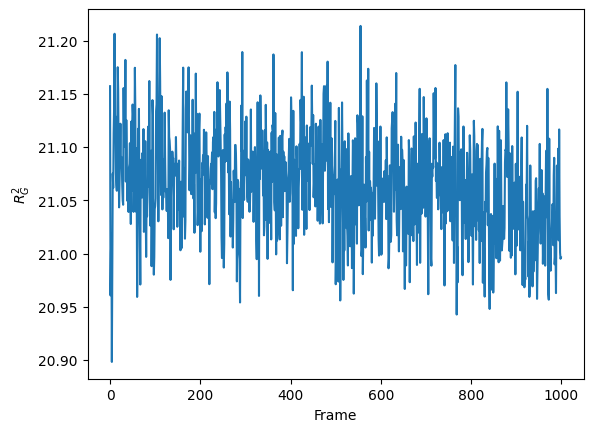

In [225]:
rog = []
O_mon = u.select_atoms("type O") # "o_mon" is oxygens in monomers, typically would want to do for one atom
print(len(O_mon))
for ts in u.trajectory:
    rog.append(O_mon.radius_of_gyration())
    
plt.plot(rog)
plt.xlabel("Frame")
plt.ylabel(f'$R^2_G$')